# 붓꽃 데이터를 활용해 품종을 분류하는 Descion Tree classification model
* 분류(classification)는 대표적인 지도 학습 (superviesed learning) 방법 중 하나이다. 지도 학습은 정답이 주어진 학습 데이터를 먼저 학습한 뒤 학습되지 않은 데이터로 부터 정답을 예측하는 방식이다.

*우선 사이킷런을 사용하기 위해서는 sklearn 패키지에서 사용할 모듈을 import

  - sklearn.dataset
: 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈
  - sklearn.tree
: 트리 기반 ML 알고리즘을 구현한 클래스의 모임
  - sklearn.model_selection
: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
  - 하이퍼 파라미터 (hyper parameter)
: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭한다.

  - 붓꽃 dataset을 생성하기 위해 load_iris()를 사용하며, ML 알고리즘으로는 의사 결정 트리(Decision Tree) 알고리즘으로 DecisionTreeClassifier를 사용한다. 그리고 학습 데이터와 테스트 데이터로 분리하기 위해 train_test_split() 함수를 사용한다.

* 붓꽃의 특징(feature, attribute)들은 sepal length, sepal width, petal length, petal width로 4종류가 있고, label은 setosa, versicolor, virginica로 3종류가 있다.
  -  Sepal Length	꽃받침의 길이 정보이다.
  - Sepal Width	꽃받침의 너비 정보이다.
  - Petal Length	꽃잎의 길이 정보이다.
  - Petal Width	꽃잎의 너비 정보이다.  
  - Species	꽃의 종류 정보이다.  setosa / versicolor / virginica 의 3종류로 구분된다

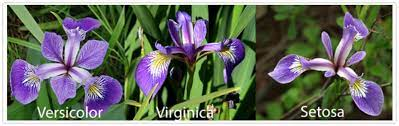

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 데이터 로드
iris = load_iris()

* load_iris() 함수를 사용해 붓꽃 dataset을 불러온 뒤, 데이터가 어떻게 구성되어 있는지 확인하기 위해 DataFrame으로 변환

In [2]:
import pandas as pd

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', list(set(iris_label)))
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(-5) #For negative values of n, this function returns all rows except the last |n| rows, equivalent to df[:n].

iris target값: [0, 1, 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2


In [3]:
# 학습용 데이터와 테스트용 데이터로 분리
# random_state는 함수를 호출할 때마다 똑같이 data를 분할하시 위한 random seed 값
# random seed 값이 설정되어 있지 않으면 data를 항상 random하게 불러오기 때문에 매번 다른 결과가 나오게 될 수 있음

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [4]:
# DecisionTreeClassifier 객체를 불러온 뒤 fit() method에 학습용 데이터를 넣어주고 학습을 수행
model = DecisionTreeClassifier(random_state=4,)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=4)

- 주요 매개변수
  - criterion: 분할 품질을 측정하는 기능입니다. "gini"(기본값) 또는 "entropy"를 사용할 수 있음
  - splitter: 분할 전략입니다. "best"(기본값)는 가장 좋은 분할을 선택하고, "random"은 임의의 분할을 선택
  - max_depth: 트리의 최대 깊이입니다. 기본값은 None으로 설정되어 있어 트리가 완전히 성장할 때까지 분할
  - min_samples_split: 내부 노드를 분할하기 위한 최소 샘플 수. 기본값은 2
  - min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수. 기본값은 1
  - max_features: 분할에 사용할 최대 특징 수입니다. 기본값은 None으로 모든 특징을 사용

- 주요 메서드
  - fit(X, y): 데이터 X와 레이블 y를 사용하여 트리를 학습시킵니다.
  - predict(X): 학습된 트리를 사용하여 데이터 X의 예측을 수행합니다.
  - score(X, y): 데이터 X와 레이블 y에 대한 예측 정확도를 반환합니다.
  - get_params(): 모델의 매개변수를 반환합니다.
  - set_params(**params): 모델의 매개변수를 설정합니다.


* DecisionTreeClassifier Document
 -  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
.


In [5]:
# 학습을 완료하게 되면 예측을 수행하는데 이때는 predict() method에 test_set 데이터를 사용하고, 모델이 예측한 결과를 반환
Y_predict=model.predict(X_test)

In [6]:
# 정확도 측정
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print('예측 정확도: {0:.4f}'.format(accuracy_score(Y_test, Y_predict)))

예측 정확도: 0.9333


In [7]:
confusion_matrix(Y_test, Y_predict)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]])

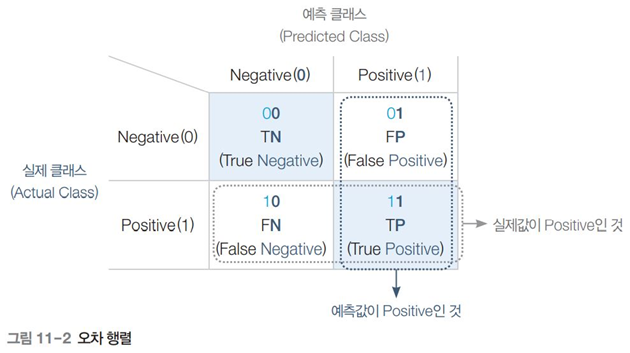

In [8]:
# 성능 평가 지표인 정확도(Accurcy), 정밀도(Precision), 재현율(recall), F1 스코어, ROC-AUC 스코어를 구함
# average = "macro" -> multi class 성능의 평균을 의미
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict, average = "macro")
recall = recall_score(Y_test, Y_predict, average = "macro")
f1 = f1_score(Y_test, Y_predict, average = "macro")

In [9]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.933, 정밀도: 0.944, 재현율: 0.939,  F1: 0.936


* sklearn의 tree 모듈의 plot_tree 함수를 활용해 완성된 결정트리를 그린다.

[Text(0.3076923076923077, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8333333333333333, 'True  '),
 Text(0.38461538461538464, 0.75, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8333333333333333, '  False'),
 Text(0.15384615384615385, 0.5833333333333334, 'petal length (cm) <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.5833333333333334, 'petal width (cm) <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]\nclass = virginica')

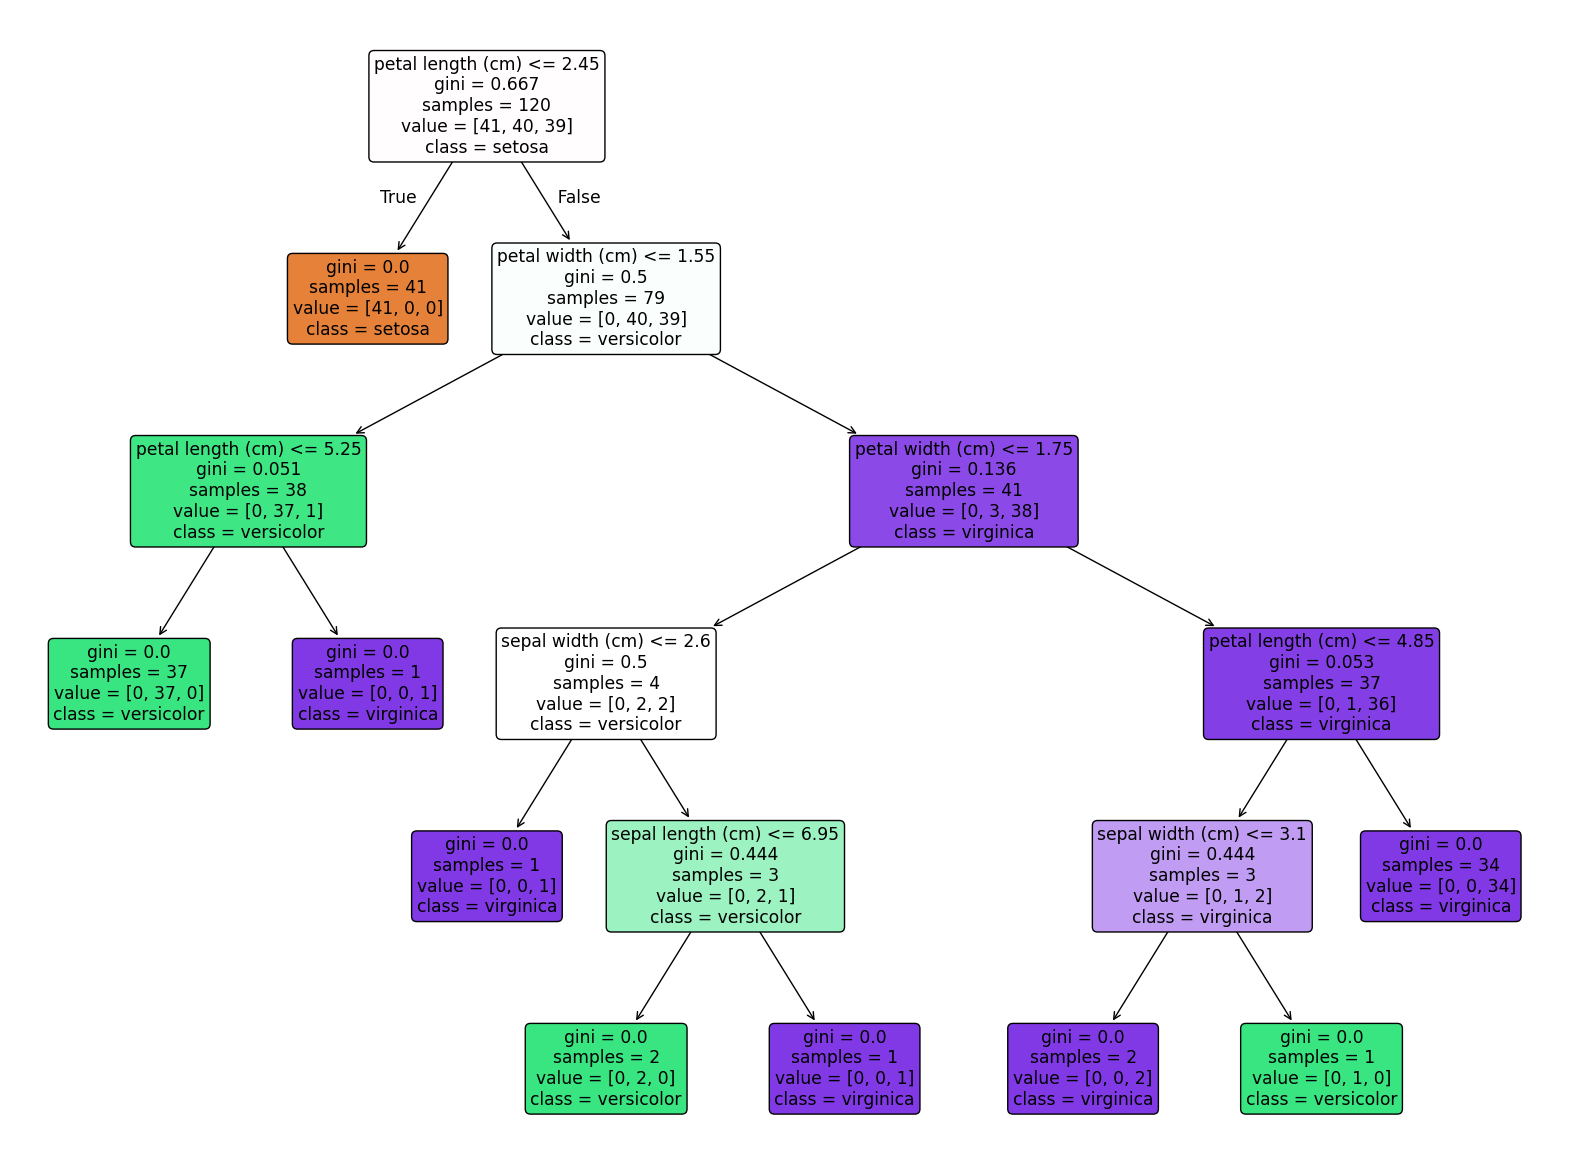

In [10]:
# 결정트리 규칙을 시각화
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(20,15) )
tree.plot_tree(model,
               class_names=iris.target_nxames,
               feature_names=iris.feature_names,
               impurity=True, filled=True,
               rounded=True)

# 가지치기
* 위에서 만든 결정트리는 학습 데이터에 완전 적합(과적합)되어 있다. 따라서 다른 데이터엔 적절하게 사용될 수 없음
* 따라서 적절히 가치지기를 수행
* max_depth를 3으로 주고 시각화를 진행

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.375, 'petal width (cm) <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica')]

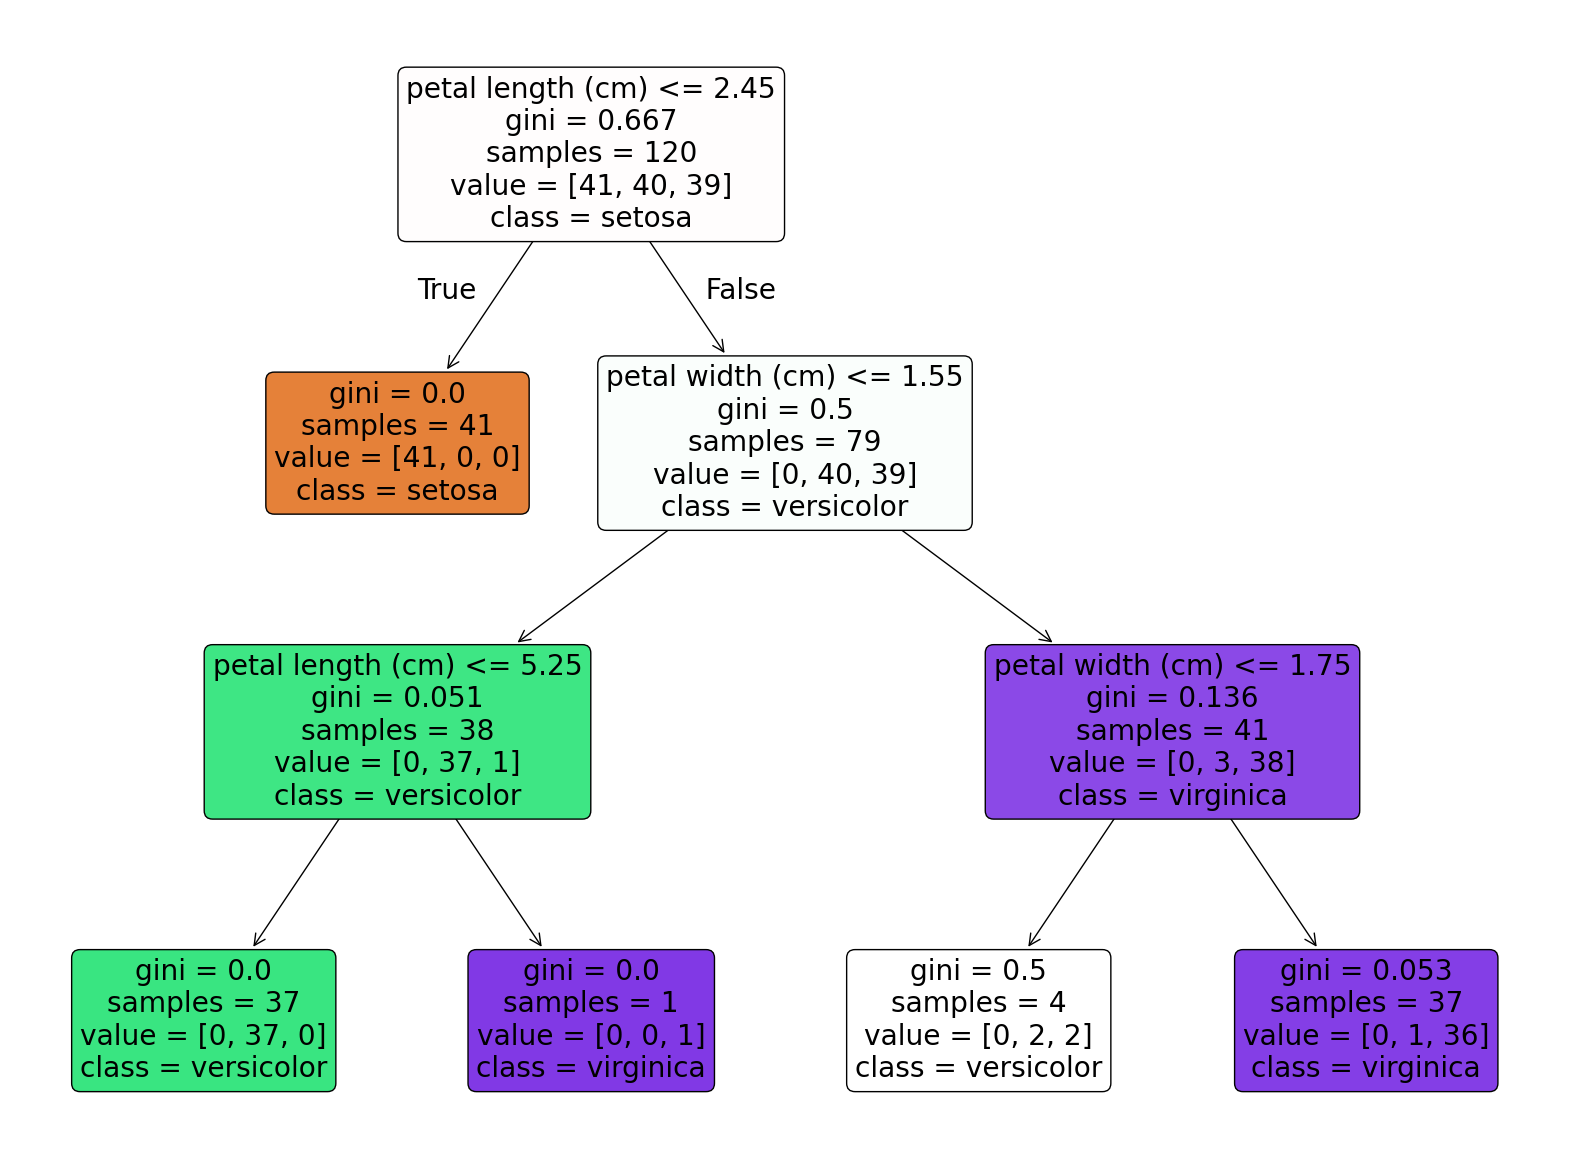

In [11]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, Y_train)

# 결정트리 규칙 시각화
plt.figure( figsize=(20,15) )
tree.plot_tree(model,
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True,
               rounded=True)

* 깊이 3일 때까지만 분류를 진행했음을 알 수 있다.
* 이 외에도 min_samples_split(리프 노드가 될 수 있는 샘플 데이터 최소값), min_samples_leaf(리프 노드가 될 수 있는 샘플 데이터 최소값), max_leaf_nodes (리프 노드가 될 수 있는 샘플 데이터 최대값) 등을 조절해 가지치기를 할 수 있다.

# Feature Importance (특성 중요도)
* 트리 분류 모델 형성에 각 특성이 얼마나 작용했는지 평가하는 지표이다.
* 해당 지표는 0~1사이의 값을 가지며, 0이면 특성이 전혀 작용하지 않았음을 의미하고 1은 완전하게 작용했음을 의미한다.
* 특성 중요도 전체의 합은 1이다

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<Axes: >

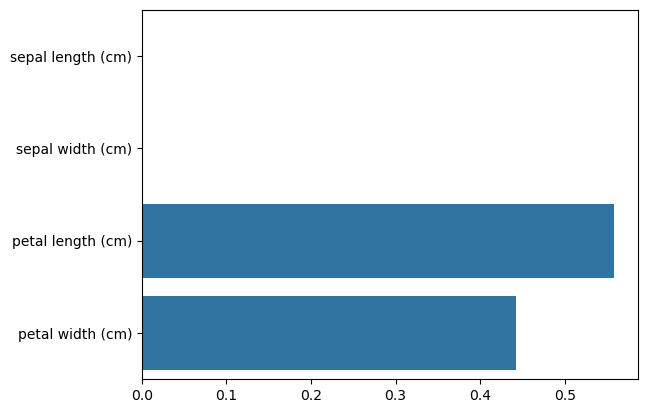

In [12]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature별 importance 매핑
for name, value in zip(iris.feature_names , model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=model.feature_importances_ , y=iris.feature_names)